In [17]:
import actualNN as nn
import numpy as np
from graph import Graph
from scipy.sparse import csr_matrix

In [19]:
def make_sparse_adj_matrix(w):
    # Outputs the scipy.sparse adjacency matrix of the graph
    n = np.size(w)
    s = np.sum(w)
    m = ( np.dot(w,w)/s )**2 + s
    m = int(m/2)
    wsum = np.cumsum(w)
    wsum = np.insert(wsum,0,0)
    wsum = wsum / wsum[-1]
    I = np.digitize(np.random.rand(m,1),wsum)
    J = np.digitize(np.random.rand(m,1),wsum)
    row_ind = np.append(I.reshape(m,)-1,J.reshape(m,)-1)
    col_ind = np.append(J.reshape(m,1)-1,I.reshape(m,)-1)
    ones = [1 for i in range(2*m)]    
    A = csr_matrix((ones, (row_ind,col_ind)), shape=(n,n))
    A.data.fill(1)
    return A

In [20]:
np.random.pareto(1.5, 30)

array([ 0.62773314,  1.42927546,  0.10650808,  2.74442799,  0.76293525,
        0.28398974,  0.66808324,  0.08611137,  0.26668519,  0.2636153 ,
        0.19334218,  0.46207694,  0.18986173,  0.81962187,  5.78050853,
        5.67761224,  0.32920086,  0.69305358, 18.72397398,  0.43575416,
        0.04697914,  1.94260053,  0.17944477,  0.24452785,  0.39867316,
        0.25656198,  1.69898591,  1.72912335,  1.44010865,  0.76707306])

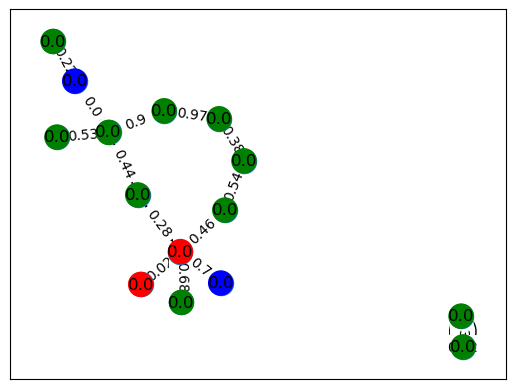

In [24]:

adjacency_matrix =make_sparse_adj_matrix(np.random.pareto(1.5, 15) + 1)
#convert to dense matrix
adjacency_matrix = np.array(adjacency_matrix.todense())
# Define the input and output nodes
input_nodes = [0, 1]
output_nodes = [4, 5]

# Define the neural network
neural_graph = Graph(adjacency_matrix)
neural_network = nn.ActualNeuralNetwork(neural_graph, input_nodes, output_nodes)
neural_network.display()

In [25]:
neural_network.forward_propagation(np.array([[13, 2], [0, 4], [2, 1]]))

array([[0.        , 1.        ],
       [0.47737119, 0.52262881],
       [0.02107394, 0.97892606]])

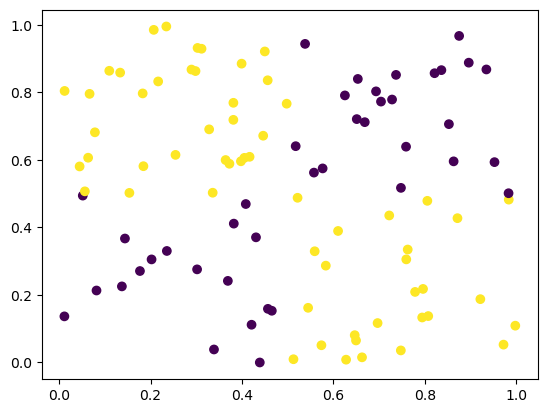

In [26]:
import benchmarks_generator
import matplotlib.pyplot as plt
inputs, outputs = benchmarks_generator.xor_dataset(100)

#plot
plt.scatter(inputs[0, :], inputs[1, :], c=outputs)

In [27]:
#convert output to onehot
outputs_onehot = np.zeros((outputs.shape[0], 2))
outputs_onehot[np.arange(outputs.shape[0]), outputs.astype(int)] = 1

In [28]:
import loss_functions
print(inputs.shape)
#train
ea_result = neural_network.train(inputs.T, outputs_onehot, loss_functions.cross_entropy_loss)

(2, 100)
 num_gens: 12267 fitness: 0.0011640908771935784 loss: 859.03946125823694

KeyboardInterrupt: 

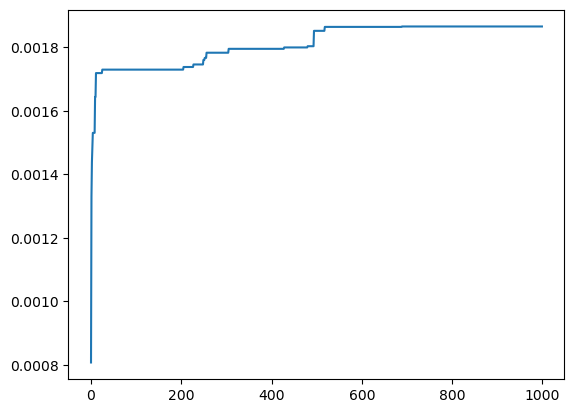

In [13]:
#plot fitness history
plt.plot(ea_result.fitness_history)
plt.show()

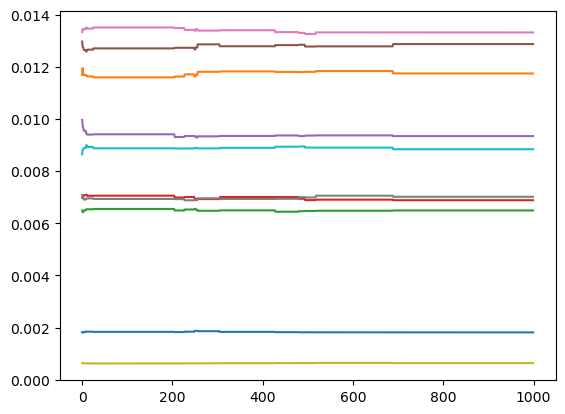

In [14]:
for i in range(10):
    plt.plot([mr[i] for mr in ea_result.mr_history])

plt.show()

In [17]:
print(neural_network.weights)

[[ 0.          0.          0.          0.         -0.13960126  0.
   0.          0.          0.31564374  0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -0.11404418  0.
   0.          0.          0.12562235]
 [ 0.          0.          0.          0.20365759  0.18867072  0.
   0.          0.         -0.0745383   0.          0.          0.
   0.          0.         -0.3595339 ]
 [ 0.          0.          0.38949559 -0.31755695  0.11945921 -0.21040237
   0.          0.          0.          0.01088653  0.         -0.42477315
  -0.09352676  0.         -0.2306902 ]
 [ 0.01015504  0.          0.26334139 -0.44123467  0.          0.
   0.         -0.28182176  0.27336375  0.42821202  0.          0.
   0.          0.         -0.23418135]
 [ 0.          0.          0.          0.30836752  0.          0.
   0.          0.         -0.20722347  0.          0.         -

In [37]:

print(loss_functions.mse(outputs_onehot, neural_network.forward_propagation(inputs.T)))

61.46795980272413


In [15]:
def accuracy(out_true, out_pred):
    return np.sum(np.argmax(out_true, axis=1) == np.argmax(out_pred, axis=1))/out_true.shape[0]

print(accuracy(outputs_onehot, neural_network.forward_propagation(inputs.T)))

0.85


c:\Users\sacha\Documents\CODE\Python\ActualNNs\actualNN.py:41: RuntimeWarning: invalid value encountered in divide
  output = output/np.sum(output, axis=1)[:, np.newaxis]


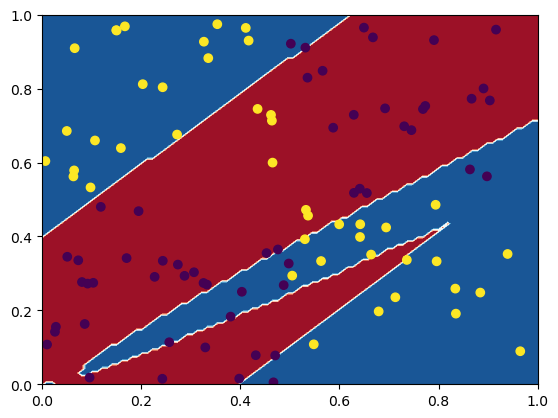

In [16]:
#plot decision boundary
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
xx, yy = np.meshgrid(x, y)
z = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        z[i, j] = np.argmax(neural_network.forward_propagation(np.array([[xx[i, j], yy[i, j]]])))
plt.contourf(xx, yy, z, cmap='RdBu')
plt.scatter(inputs[0, :], inputs[1, :], c=outputs)
plt.show()
